# LightGBM on OG & rewritten descriptions

## Loading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:

X_train = pd.read_csv('/content/drive/MyDrive/Thesis/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Thesis/y_train.csv')


In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/Thesis/part1_complete.csv')

In [ ]:
X_train.to_csv('/content/drive/MyDrive/Thesis/X_train.csv')

In [ ]:
X_train = X_train.drop(columns=['Unnamed: 0'])
y_train = y_train.drop(columns=['Unnamed: 0'])

In [ ]:
X_train

,pet_Cat,pet_Dog,pet_Rabbit,gender_Female,gender_Male,gender_Mixed,color_Black,color_Black_White,color_Brown_Chocolate,color_Golden,...,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,age_encoded,size_encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.180516,0.013883,-0.001330,0.045363,-0.045154,-0.120753,0.029061,0.160477,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119808,0.110728,0.031900,-0.066685,0.088478,0.060564,-0.138984,0.287138,0.0,3.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178771,-0.001800,0.087998,0.080699,0.137319,0.013934,-0.265653,0.318983,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.083621,0.131444,0.074253,0.004763,0.194044,0.089118,0.034386,0.392149,1.0,2.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.268244,0.253771,0.169772,-0.035420,0.186678,0.067319,-0.240549,0.531007,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.121363,0.033949,0.022230,0.020642,0.102412,0.051699,-0.163198,0.198205,0.0,2.0
187999,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.109797,0.125821,0.097630,-0.036324,0.053149,0.037388,-0.281548,0.237170,3.0,2.0
188000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.240101,0.371879,-0.372603,-0.341499,-0.475661,0.138415,0.051634,0.285470,1.0,2.0
188001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.073524,0.177094,0.053589,0.146463,0.061074,0.047811,-0.037875,0.224391,1.0,1.0


In [ ]:
y_test = new_data['adopted']

In [ ]:
og_X_test = new_data.drop(columns = ['Unnamed: 0', 'pid', 'adopted', 'description_y', 'rewritten_description'])
rw_X_test = new_data[['pet', 'age', 'gender', 'color', 'size', 'photos', 'rewritten_description']]

## Cleaning rewritten descriptions

In [ ]:
# code retrieved from: https://monkeylearn.com/blog/text-cleaning/
# making all texts lowercase, removing all links & stopwords, lemmatizing

rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].str.lower()
rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", regex=True)


<ipython-input-99-8881747f6fa6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].str.lower()
<ipython-input-99-8881747f6fa6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].str.replace(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", regex=True)


In [ ]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stopwords(text):
    if pd.isna(text):
        return ""
    return ' '.join([word for word in str(text).split() if word not in stop])

rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-100-23878b700041>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].apply(remove_stopwords)


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if pd.isna(text):
        return ""
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].apply(lemmatize_text)
rw_X_test

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-101-baa491917c85>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw_X_test['rewritten_description'] = rw_X_test['rewritten_description'].apply(lemmatize_text)


,pet,age,gender,color,size,photos,rewritten_description
0,Dog,Senior,Male,White_Cream,Small,1,brawny 8yearold male maltipoo ready new foreve...
1,Dog,Young,Male,Unknown,Medium,3,meet finnick sensitive shy pup search patient ...
2,Cat,Senior,Female,Black_White,Medium,1,sweet cat looking forever home adoption fee 55...
3,Dog,Adult,Male,Other,Small,1,felix tiny 18monthold chihuahua weighing 9 lb ...
4,Dog,Adult,Male,Gray,Large,6,vadar twoyearold handsome boy love going walk ...
...,...,...,...,...,...,...,...
7969,Dog,Senior,Female,Brown_Chocolate,Small,3,kahlua spunky smart senior dog love play fetch...
7970,Cat,Baby,Female,Brown_Chocolate,Medium,2,chaii stunning 10weekold kitten sweet beautifu...
7971,Dog,Senior,Female,White_Cream,Large,3,panda serene great pyrenees looking calm lovin...
7972,Cat,Adult,Female,Unknown,Small,1,abigail sweet affectionate cat love held aroun...


In [ ]:
#tokenizing the newly generated descriptions with the trained doc2vec model

pet_dataset = pd.read_csv('/content/drive/MyDrive/Thesis/pet_feateng1.csv', dtype={'description': str}, low_memory=False)

pet_dataset['description'] = pet_dataset['description'].fillna('')
pet_dataset['description'] = pet_dataset['description'].astype(str)

# code retrieved from: https://stackoverflow.com/questions/45125798/how-to-use-taggeddocument-in-gensim & https://radimrehurek.com/gensim/models/doc2vec.html#gensim.models.doc2vec.Doc2Vec

nltk.download('punkt')

documents = [TaggedDocument(words=word_tokenize(doc), tags=[str(i)]) for i, doc in enumerate(pet_dataset['description'])]

model = Doc2Vec(vector_size=100, seed=555)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

model.save("/content/drive/MyDrive/Thesis/doc2vec.model")

new_vectors = [model.infer_vector(word_tokenize(doc.lower())) for doc in rw_X_test['rewritten_description']]

vector_df = pd.DataFrame(new_vectors)
vector_df.columns = [f'vector_{i}' for i in range(vector_df.shape[1])]

rw2_X_test = pd.concat([rw_X_test.reset_index(drop=True), vector_df.reset_index(drop=True)], axis=1)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
rw2_X_test = rw2_X_test.drop(columns= ['rewritten_description'])
rw2_X_test

,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,vector_3,...,vector_90,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99
0,Dog,Senior,Male,White_Cream,Small,1,0.248611,0.326382,-0.299888,-0.251811,...,-0.247072,0.190189,0.155524,0.049673,0.266224,-0.025897,0.285195,0.132317,-0.284784,0.297327
1,Dog,Young,Male,Unknown,Medium,3,0.279130,0.253376,-0.289172,-0.238459,...,-0.010863,0.103695,0.114626,0.032034,0.164107,0.053873,0.246813,-0.020053,-0.095652,0.163871
2,Cat,Senior,Female,Black_White,Medium,1,-0.081264,0.017133,-0.252834,-0.224773,...,0.077255,-0.043077,-0.070270,0.123994,0.118126,0.156004,0.125877,0.037714,0.102553,-0.130906
3,Dog,Adult,Male,Other,Small,1,0.285721,0.549000,0.098666,-0.134244,...,0.243827,-0.082461,0.035308,0.003289,0.308854,0.137232,0.304505,-0.086967,-0.229572,0.262549
4,Dog,Adult,Male,Gray,Large,6,-0.104635,0.121948,-0.186876,-0.186518,...,0.082036,0.008526,0.143910,-0.024513,0.223837,0.082466,0.073994,0.114810,-0.199204,0.221928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,Dog,Senior,Female,Brown_Chocolate,Small,3,0.209779,0.304065,-0.241039,-0.230539,...,-0.098778,-0.005296,-0.046584,-0.184834,-0.163582,0.017430,0.250148,-0.071253,-0.245600,0.048035
7970,Cat,Baby,Female,Brown_Chocolate,Medium,2,0.021223,0.272543,-0.101476,-0.204949,...,0.071496,0.220422,-0.072600,0.084162,0.241388,0.202448,0.160773,0.079874,0.029208,0.215043
7971,Dog,Senior,Female,White_Cream,Large,3,0.114014,0.164227,-0.179731,0.021021,...,-0.096304,0.092298,-0.138164,-0.172581,0.229482,0.024288,0.197273,-0.168873,-0.288752,0.102135
7972,Cat,Adult,Female,Unknown,Small,1,0.137311,0.312252,-0.136941,-0.054072,...,0.247564,0.056429,-0.147400,0.110404,0.044233,0.157919,0.309270,0.084485,-0.109108,0.013477


In [ ]:
#encoding the categorical variables

label_encoder = LabelEncoder()

y_test['adopted_encoded'] = label_encoder.fit_transform(y_test)

y_test['adopted_encoded'] = np.where(y_test['adopted_encoded'] == 0, 1, 0)

y_train['adopted_encoded'] = label_encoder.fit_transform(y_train)

y_train['adopted_encoded'] = np.where(y_train['adopted_encoded'] == 0, 1, 0)

y_test = y_test.drop(columns=['adopted'])
y_train = y_train.drop(columns=['adopted'])

y_test = y_test['adopted_encoded']
y_train = y_train['adopted_encoded']

<ipython-input-107-d6796002fd43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['adopted_encoded'] = label_encoder.fit_transform(y_test)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train= y_train.to_numpy()
y_train

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
label_encoder = LabelEncoder()


y_test['adopted_encoded'] = label_encoder.fit_transform(y_test)

y_test['adopted_encoded'] = np.where(y_test['adopted_encoded'] == 0, 1, 0)

y_test = y_test.drop(columns=['adopted'])
y_test = y_test['adopted_encoded']

<ipython-input-9-2438ac456781>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['adopted_encoded'] = label_encoder.fit_transform(y_test)


In [ ]:
y_test

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
ordinal_encoder = OrdinalEncoder()

X_train['age_encoded'] = ordinal_encoder.fit_transform(X_train[['age']])
X_train['size_encoded'] = ordinal_encoder.fit_transform(X_train[['size']])

X_train = X_train.drop(['age', 'size'], axis=1)

In [ ]:
ordinal_encoder = OrdinalEncoder()

og_X_test['age_encoded'] = ordinal_encoder.fit_transform(og_X_test[['age']])
og_X_test['size_encoded'] = ordinal_encoder.fit_transform(og_X_test[['size']])

og_X_test = og_X_test.drop(['age', 'size'], axis=1)

In [ ]:
ordinal_encoder = OrdinalEncoder()

rw2_X_test['age_encoded'] = ordinal_encoder.fit_transform(rw2_X_test[['age']])
rw2_X_test['size_encoded'] = ordinal_encoder.fit_transform(rw2_X_test[['size']])

rw2_X_test = rw2_X_test.drop(['age', 'size'], axis=1)

In [ ]:
# code from: https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns

ohe = OneHotEncoder(sparse_output=False)

Xtrain_encoded = ohe.fit_transform(X_train[['pet', 'gender', 'color']])

X_train_encoded = pd.DataFrame(Xtrain_encoded, columns=ohe.get_feature_names_out(['pet', 'gender', 'color']))

data_other_cols = X_train.drop(columns=['pet', 'gender', 'color'])

X_train = pd.concat([X_train_encoded, data_other_cols], axis=1)


In [ ]:
X_train

,pet_Cat,pet_Dog,pet_Rabbit,gender_Female,gender_Male,gender_Mixed,gender_Unknown,color_Black,color_Black_White,color_Brown_Chocolate,...,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,age_encoded,size_encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.180516,0.013883,-0.001330,0.045363,-0.045154,-0.120753,0.029061,0.160477,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119808,0.110728,0.031900,-0.066685,0.088478,0.060564,-0.138984,0.287138,0.0,3.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178771,-0.001800,0.087998,0.080699,0.137319,0.013934,-0.265653,0.318983,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083621,0.131444,0.074253,0.004763,0.194044,0.089118,0.034386,0.392149,1.0,2.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.268244,0.253771,0.169772,-0.035420,0.186678,0.067319,-0.240549,0.531007,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.121363,0.033949,0.022230,0.020642,0.102412,0.051699,-0.163198,0.198205,0.0,2.0
187999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.109797,0.125821,0.097630,-0.036324,0.053149,0.037388,-0.281548,0.237170,3.0,2.0
188000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.240101,0.371879,-0.372603,-0.341499,-0.475661,0.138415,0.051634,0.285470,1.0,2.0
188001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.073524,0.177094,0.053589,0.146463,0.061074,0.047811,-0.037875,0.224391,1.0,1.0


In [ ]:
# code from: https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns

ohe = OneHotEncoder(sparse_output=False)

oXtest_encoded = ohe.fit_transform(og_X_test[['pet', 'gender', 'color']])

oX_test_encoded = pd.DataFrame(oXtest_encoded, columns=ohe.get_feature_names_out(['pet', 'gender', 'color']))

data_other_cols = og_X_test.drop(columns=['pet', 'gender', 'color'])

og_X_test = pd.concat([oX_test_encoded, data_other_cols], axis=1)

In [ ]:
# code from: https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns

ohe = OneHotEncoder(sparse_output=False)

rXtest_encoded = ohe.fit_transform(rw2_X_test[['pet', 'gender', 'color']])

rX_test_encoded = pd.DataFrame(rXtest_encoded, columns=ohe.get_feature_names_out(['pet', 'gender', 'color']))

data_other_cols = rw2_X_test.drop(columns=['pet', 'gender', 'color'])

rw2_X_test = pd.concat([rX_test_encoded, data_other_cols], axis=1)

In [ ]:
X_train

,pet_Cat,pet_Dog,pet_Rabbit,gender_Female,gender_Male,gender_Mixed,gender_Unknown,color_Black,color_Black_White,color_Brown_Chocolate,...,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,age_encoded,size_encoded
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.180516,0.013883,-0.001330,0.045363,-0.045154,-0.120753,0.029061,0.160477,0.0,1.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119808,0.110728,0.031900,-0.066685,0.088478,0.060564,-0.138984,0.287138,0.0,3.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178771,-0.001800,0.087998,0.080699,0.137319,0.013934,-0.265653,0.318983,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.083621,0.131444,0.074253,0.004763,0.194044,0.089118,0.034386,0.392149,1.0,2.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.268244,0.253771,0.169772,-0.035420,0.186678,0.067319,-0.240549,0.531007,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.121363,0.033949,0.022230,0.020642,0.102412,0.051699,-0.163198,0.198205,0.0,2.0
187999,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.109797,0.125821,0.097630,-0.036324,0.053149,0.037388,-0.281548,0.237170,3.0,2.0
188000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.240101,0.371879,-0.372603,-0.341499,-0.475661,0.138415,0.051634,0.285470,1.0,2.0
188001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.073524,0.177094,0.053589,0.146463,0.061074,0.047811,-0.037875,0.224391,1.0,1.0


In [ ]:
for i in X_train.columns:
  if i not in rw2_X_test:
    print(i)

gender_Unknown


In [ ]:
X_train = X_train.drop(columns=['gender_Unknown'])

In [ ]:
print(X_train.shape, og_X_test.shape, rw2_X_test.shape, y_train.shape, y_test.shape)

(188003, 118) (7974, 118) (7974, 118) (188003,) (7974,)


## Training + fitting

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

lgbm = LGBMClassifier(
    objective='binary',
    num_leaves=50,
    num_iterations=1500,
    learning_rate=0.1,
    random_state=555
)

lgbm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 94198, number of negative: 93805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.112922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25545
[LightGBM] [Info] Number of data points in the train set: 188003, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501045 -> initscore=0.004181
[LightGBM] [Info] Start training from score 0.004181


LGBMClassifier(num_iterations=1500, num_leaves=50, objective='binary',
               random_state=555)

In [ ]:
og_predictions = lgbm.predict(og_X_test)
print(f"Test accuracy og : {accuracy_score(y_test, og_predictions)}")

og_predictions_df = pd.DataFrame(og_predictions)

og_predictions_df.to_csv('/content/drive/MyDrive/Thesis/og_predictions.csv', index=False)

rw_predictions = lgbm.predict(rw2_X_test)
print(f"Test accuracy rw : {accuracy_score(y_test, rw_predictions)}")

rw_predictions_df = pd.DataFrame(rw_predictions)
rw_predictions_df.to_csv('/content/drive/MyDrive/Thesis/rw_predictions.csv', index=False)

Test accuracy og : 0.7968397291196389
Test accuracy rw : 0.6550037622272386


In [ ]:

og_predictions = pd.read_csv('/content/drive/MyDrive/Thesis/og_predictions.csv')

rw_predictions = pd.read_csv('/content/drive/MyDrive/Thesis/rw_predictions.csv')

In [ ]:
f1 = f1_score(y_test, og_predictions)
print(f"F1-Score og: {f1}")

print(classification_report(y_test, og_predictions))

F1-Score og: 0.8037790697674418
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3817
           1       0.81      0.80      0.80      4157

    accuracy                           0.80      7974
   macro avg       0.80      0.80      0.80      7974
weighted avg       0.80      0.80      0.80      7974



In [ ]:
f1 = f1_score(y_test, rw_predictions)
print(f"F1-Score rw: {f1}")

print(classification_report(y_test, rw_predictions))

F1-Score rw: 0.6868525896414341
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      3817
           1       0.65      0.73      0.69      4157

    accuracy                           0.66      7974
   macro avg       0.66      0.65      0.65      7974
weighted avg       0.66      0.66      0.65      7974



Confusion matrix og


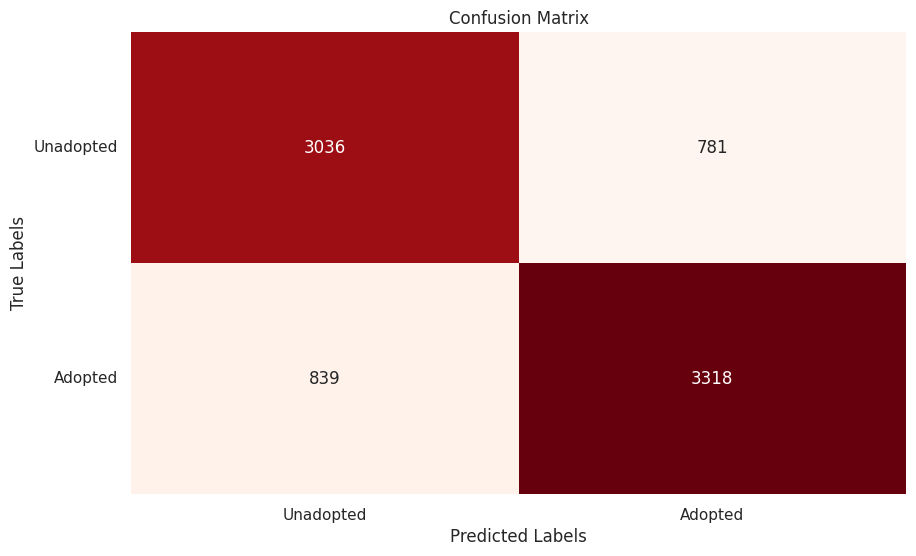

In [ ]:
# code retrieved from: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
print("Confusion matrix og")

conf_matrix = confusion_matrix(y_test, og_predictions)

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Reds', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_labels = ['Unadopted', 'Adopted']
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0, va="center")

plt.show()

Confusion matrix rw


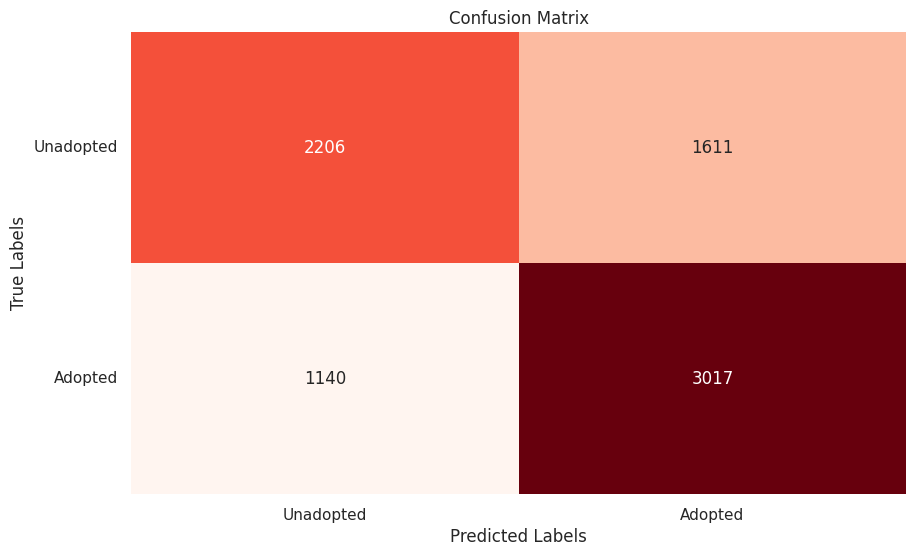

In [ ]:
# code retrieved from: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
print("Confusion matrix rw")

conf_matrix = confusion_matrix(y_test, rw_predictions)

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Reds', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

class_labels = ['Unadopted', 'Adopted']
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0, va="center")

plt.show()

class count og)
Actual Class Counts:
{'Adopted': 4157, 'Unadopted': 3817}
Predicted Class Counts:
{'Adopted': 4099, 'Unadopted': 3875}


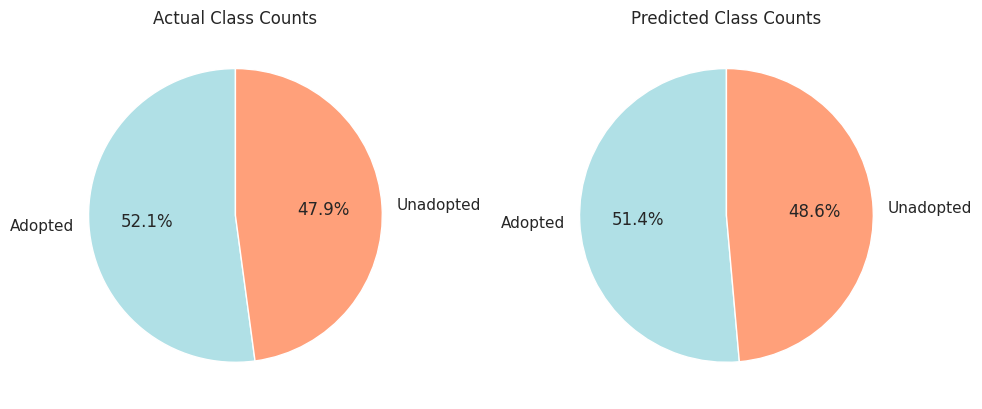

In [ ]:
# visualizing the number of the adoption/no adoption predictions vs the real number
print("class count og)")

# Actual Class Counts
actual_classes, actual_counts = np.unique(y_test, return_counts=True)
actual_class_counts = dict(zip(['Adopted' if x == 1 else 'Unadopted' for x in actual_classes[::-1]], actual_counts[::-1]))
print("Actual Class Counts:")
print(actual_class_counts)

# Predicted Class Counts
predicted_classes, predicted_counts = np.unique(og_predictions, return_counts=True)
predicted_class_counts = dict(zip(['Adopted' if x == 1 else 'Unadopted' for x in predicted_classes[::-1]], predicted_counts[::-1]))
print("Predicted Class Counts:")
print(predicted_class_counts)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].pie(actual_counts[::-1], labels=actual_class_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['powderblue', 'lightsalmon'])
ax[0].set_title('Actual Class Counts')
ax[1].pie(predicted_counts[::-1], labels=predicted_class_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['powderblue', 'lightsalmon'])
ax[1].set_title('Predicted Class Counts')

plt.tight_layout()
plt.show()

class count rw)
Actual Class Counts:
{'Adopted': 4157, 'Unadopted': 3817}
Predicted Class Counts:
{'Adopted': 4628, 'Unadopted': 3346}


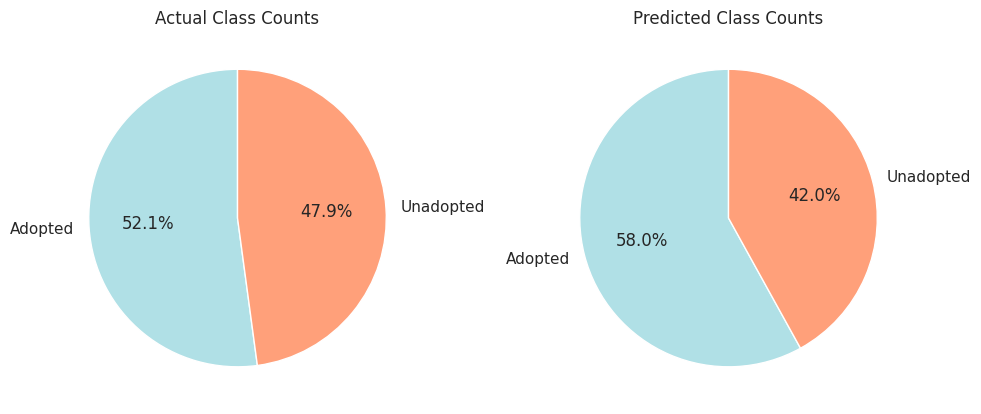

In [ ]:
# visualizing the number of the adoption/no adoption predictions vs the real number
print("class count rw)")
# Actual Class Counts
actual_classes, actual_counts = np.unique(y_test, return_counts=True)
actual_class_counts = dict(zip(['Adopted' if x == 1 else 'Unadopted' for x in actual_classes[::-1]], actual_counts[::-1]))
print("Actual Class Counts:")
print(actual_class_counts)

# Predicted Class Counts
predicted_classes, predicted_counts = np.unique(rw_predictions, return_counts=True)
predicted_class_counts = dict(zip(['Adopted' if x == 1 else 'Unadopted' for x in predicted_classes[::-1]], predicted_counts[::-1]))
print("Predicted Class Counts:")
print(predicted_class_counts)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].pie(actual_counts[::-1], labels=actual_class_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['powderblue', 'lightsalmon'])
ax[0].set_title('Actual Class Counts')
ax[1].pie(predicted_counts[::-1], labels=predicted_class_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['powderblue', 'lightsalmon'])
ax[1].set_title('Predicted Class Counts')

plt.tight_layout()
plt.show()

Predicted Class Counts:
{'Adopted': 4099, 'Unadopted': 3875}
Predicted Class Counts:
{'Adopted': 4628, 'Unadopted': 3346}


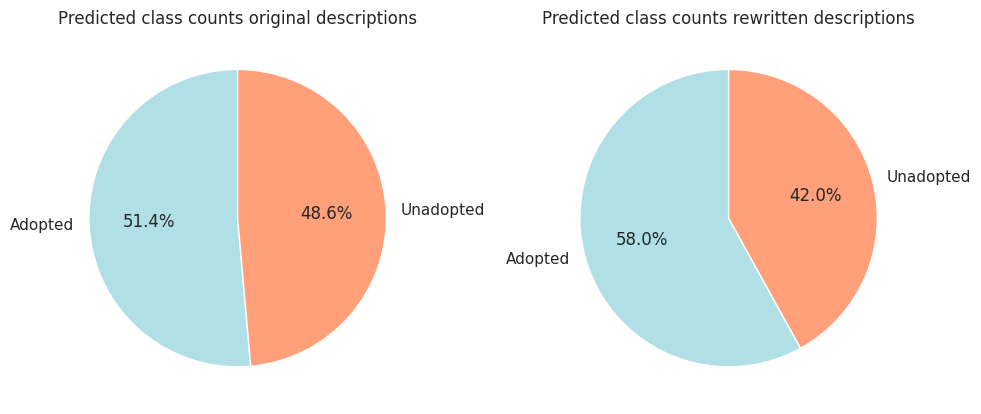

In [ ]:
#visualizing the two predictions next to each other

# Predicted Class Counts OG
predicted_classes1, predicted_counts1 = np.unique(og_predictions, return_counts=True)
predicted_class_counts1 = dict(zip(['Adopted' if x == 1 else 'Unadopted' for x in predicted_classes1[::-1]], predicted_counts1[::-1]))
print("Predicted Class Counts:")
print(predicted_class_counts1)

# Predicted Class Counts RW
predicted_classes, predicted_counts = np.unique(rw_predictions, return_counts=True)
predicted_class_counts = dict(zip(['Adopted' if x == 1 else 'Unadopted' for x in predicted_classes[::-1]], predicted_counts[::-1]))
print("Predicted Class Counts:")
print(predicted_class_counts)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].pie(predicted_counts1[::-1], labels=predicted_class_counts1.keys(), autopct='%1.1f%%', startangle=90, colors=['powderblue', 'lightsalmon'])
ax[0].set_title('Predicted class counts original descriptions')
ax[1].pie(predicted_counts[::-1], labels=predicted_class_counts.keys(), autopct='%1.1f%%', startangle=90, colors=['powderblue', 'lightsalmon'])
ax[1].set_title('Predicted class counts rewritten descriptions')

plt.tight_layout()
plt.show()

In [ ]:
rw_predictions = rw_predictions['0'].to_numpy()
og_predictions = og_predictions['0'].to_numpy()

In [ ]:
og_predictions = og_predictions.ravel()
rw_predictions = rw_predictions.ravel()

In [ ]:
# performing McNemar's test
from statsmodels.stats.contingency_tables import mcnemar

data = {'Original': (og_predictions == 1), 'Modified': (rw_predictions == 1)}
df = pd.DataFrame(data)

conf_matrix = confusion_matrix(df['Original'], df['Modified'])

result = mcnemar(conf_matrix, exact = False)

print(f"Test statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")
if result.pvalue < 0.05:
    print("Significant differences found.")
else:
    print("No significant differences found.")

Test statistic: 123.41035856573706
P-value: 1.1339525214697867e-28
Significant differences found.


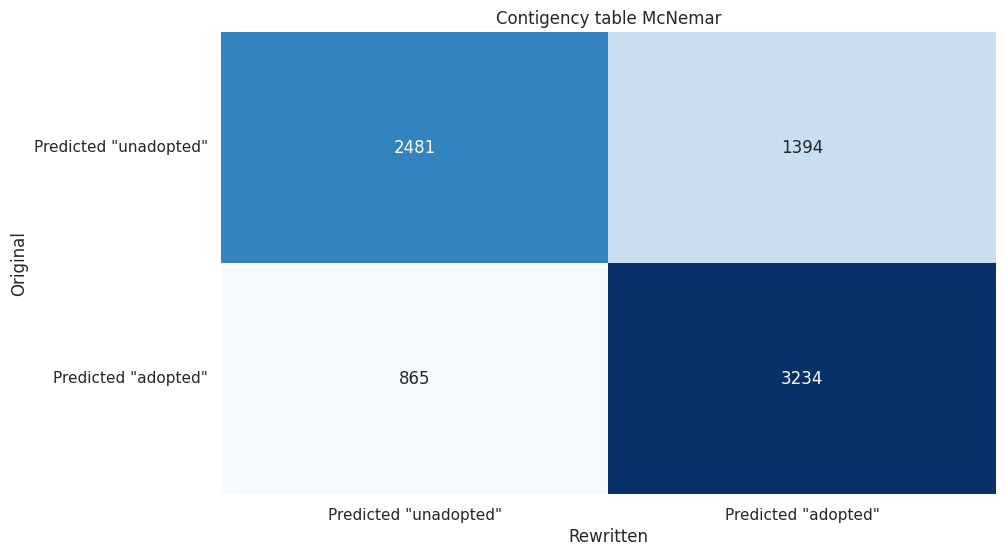

In [ ]:
# contigency table

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)

plt.title('Contigency table McNemar')
plt.xlabel('Rewritten')
plt.ylabel('Original')

class_labels = ['Predicted "unadopted"', 'Predicted "adopted"']
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0, va="center")

plt.show()

## EDA

In [ ]:
new_data

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,rewritten_description
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,-0.134316,0.352780,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,"Brawny, an 8-year-old male Malti-Poo, is ready..."
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.012253,0.006966,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu...","Meet Finnick, a sensitive and shy pup in searc..."
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.209824,0.061069,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",This sweet cat is looking for a forever home! ...
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.153102,-0.006564,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...,Felix is a tiny 18-month-old Chihuahua weighin...
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,-0.008426,-0.043694,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...,Vadar is a two-year-old handsome boy who loves...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,215678,Dog,Senior,Female,Brown_Chocolate,Small,3,-0.155340,-0.003608,-0.432607,...,-0.323024,-0.147513,-0.212039,-0.231464,-0.157857,0.086146,37476960,Unadopted,"Kahlua recently lost her (real) Mom, who made ...",Kahlua is a spunky and smart senior dog who lo...
7970,74376,Cat,Baby,Female,Brown_Chocolate,Medium,2,0.085067,0.011910,0.002799,...,-0.072335,0.064474,-0.070534,0.206427,0.049355,0.243603,43529102,Adopted,It almost seems unfair that one kitten can be ...,Chaii is a stunning 10-week-old kitten who is ...
7971,208890,Dog,Senior,Female,White_Cream,Large,3,-0.190325,0.142001,-0.036622,...,0.194289,-0.093262,0.184321,0.241022,-0.235496,0.717466,40080248,Unadopted,NYS Registered Rescue # RR102 View full listin...,Panda is a serene Great Pyrenees looking for a...
7972,60846,Cat,Adult,Female,Unknown,Small,1,0.056520,0.060410,-0.230726,...,0.079041,0.059379,0.003416,0.097963,-0.244182,0.339680,36739879,Adopted,Abigail loves to be held and is very affection...,Abigail is a sweet and affectionate cat who lo...


In [ ]:

og_predictions = pd.read_csv('/content/drive/MyDrive/Thesis/og_predictions.csv')

rw_predictions = pd.read_csv('/content/drive/MyDrive/Thesis/rw_predictions.csv')

In [ ]:
og_predictions

,0
0,1
1,0
2,1
3,1
4,0
...,...
7969,0
7970,0
7971,0
7972,0


In [ ]:

new_data['og_predictions'] = og_predictions['0']
new_data['rw_predictions'] = rw_predictions['0']


In [ ]:
new_data

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,rewritten_description,og_predictions,rw_predictions
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,"Brawny, an 8-year-old male Malti-Poo, is ready...",1,0
1,163205,Dog,Young,Male,Unknown,Medium,3,-0.063906,-0.120907,-0.150912,...,0.047521,0.012037,-0.279150,0.272248,42274229,Unadopted,"Hi there, I'm Finnick! I'm a shy, sensitive pu...","Meet Finnick, a sensitive and shy pup in searc...",0,1
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",This sweet cat is looking for a forever home! ...,1,0
3,132421,Dog,Adult,Male,Other,Small,1,0.072339,-0.030328,0.062557,...,0.100330,0.073430,-0.020734,0.133471,40978479,Unadopted,WAGS RESCUE WELCOMES SWEET FELIX... This tiny ...,Felix is a tiny 18-month-old Chihuahua weighin...,1,1
4,140095,Dog,Adult,Male,Gray,Large,6,-0.073295,-0.003285,-0.058319,...,0.184267,0.098949,-0.047755,0.270142,40815035,Unadopted,Handsome Vadar was rescued from Baldwin Park A...,Vadar is a two-year-old handsome boy who loves...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,215678,Dog,Senior,Female,Brown_Chocolate,Small,3,-0.155340,-0.003608,-0.432607,...,-0.212039,-0.231464,-0.157857,0.086146,37476960,Unadopted,"Kahlua recently lost her (real) Mom, who made ...",Kahlua is a spunky and smart senior dog who lo...,0,1
7970,74376,Cat,Baby,Female,Brown_Chocolate,Medium,2,0.085067,0.011910,0.002799,...,-0.070534,0.206427,0.049355,0.243603,43529102,Adopted,It almost seems unfair that one kitten can be ...,Chaii is a stunning 10-week-old kitten who is ...,0,1
7971,208890,Dog,Senior,Female,White_Cream,Large,3,-0.190325,0.142001,-0.036622,...,0.184321,0.241022,-0.235496,0.717466,40080248,Unadopted,NYS Registered Rescue # RR102 View full listin...,Panda is a serene Great Pyrenees looking for a...,0,0
7972,60846,Cat,Adult,Female,Unknown,Small,1,0.056520,0.060410,-0.230726,...,0.003416,0.097963,-0.244182,0.339680,36739879,Adopted,Abigail loves to be held and is very affection...,Abigail is a sweet and affectionate cat who lo...,0,0


In [ ]:
filtered_df = new_data[(new_data['pet'] == 'Dog') & (new_data['size'] == 'Small') & (new_data['age'] == 'Young') & (new_data['color'] == 'Black')]


In [ ]:
filtered_df = filtered_df.reset_index()

In [ ]:
filtered_df.iloc[16]['description_y']

"Hi ya Peeps! It's me Metro Barkley and I am looking for love and a future right here on Petfinder. So read about me and let me know if you think we might be a good match. I'm looking forward to meeting you soon! Here's my stats: Possible Breed: Lhasa Apso Gender: I'm a guy, an hombre, a dude Colors: Classic black and white Age: The vet says about 2 years young Weight: Around 13 pounds Metro needs a very special foster or family to help him with fear. When he first meets someone, he is very afraid and nips. Once he gets to know a person, this behavior disappears and you'd never know he has this tendency. The perfect home has no kids under 16 and people who are patient and understanding. He needs time to learn that humans won't hurt him again. If you have not yet been approved, begin an application to adopt Metro or one of our other pups at www.shihtzu-rescue.com. PS. I've had ALL my vetting, and oh boy, it was a lot. Here's what I had done: Distemper/Parvo shots- TWICE. One shot doesn'

In [ ]:
filtered_df.iloc[16]['rewritten_description'] # this is an example that normally was not adopted and not predcited as adopted, but with the rewritten description it was

'Metro Barkley is a handsome 2-year-old Lhasa Apso weighing around 13 pounds, with classic black and white coloring. While he may be fearful initially and nip, with time and patience, he becomes an affectionate and loving companion. Metro would thrive in a home with no kids under 16 and caregivers who are understanding and gentle. He has undergone extensive vetting, including multiple vaccinations, spay/neuter, fecal exams, heartworm testing, bloodwork, and dental care. If you are ready to provide Metro with the love and security he deserves, start the adoption process at www.shihtzu-rescue.com.'

In [ ]:
filtered_df2 = new_data[(new_data['pet'] == 'Dog') & (new_data['size'] == 'Small') & (new_data['age'] == 'Young') & (new_data['color'] == 'Black') & (new_data['gender'] == 'Male')]

In [ ]:
filtered_df2 = filtered_df2.reset_index()

In [ ]:
filtered_df2

,index,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,...,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,rewritten_description,og_predictions,rw_predictions
0,1441,49343,Dog,Young,Male,Black,Small,6,-0.121777,-0.218044,...,0.088650,0.103574,-0.028310,0.314079,42736159,Adopted,This handsome guy would like nothing better th...,Kenneth is a bright and social boy who enjoys ...,1,1
1,2824,22419,Dog,Young,Male,Black,Small,3,-0.001406,-0.037863,...,0.120176,0.116002,-0.019253,0.370966,42949769,Adopted,"You know anyone can have a purebred dog, and d...",Dru is a uniquely designed dog with a long bod...,1,1
2,4111,212739,Dog,Young,Male,Black,Small,1,0.014582,0.412747,...,-0.054529,0.456621,-0.344998,0.192412,36712299,Unadopted,Shiloh Shiloh is a playful little two year-old...,Shiloh is a playful and cuddly two-year-old pu...,0,1
3,4139,79898,Dog,Young,Male,Black,Small,3,-0.186583,-0.076838,...,-0.149038,0.028844,-0.119140,0.358402,40791869,Adopted,Are you looking for an active and energetic an...,Are you searching for a loyal and energetic co...,1,1
4,4424,64173,Dog,Young,Male,Black,Small,1,-0.066086,-0.013621,...,0.059037,0.059345,0.152540,0.157250,42489893,Adopted,Our goal is to have all adopted dogs spayed/ne...,"To ensure the well-being of our furry friends,...",1,1
5,4457,21493,Dog,Young,Male,Black,Small,1,0.001903,0.026786,...,0.126646,-0.055693,-0.001383,0.234727,43468723,Adopted,WELL HERE WE GO AGAIN......... As hard as I t...,Tater is a lovable and loyal companion who is ...,1,1
6,5085,211254,Dog,Young,Male,Black,Small,3,-0.090937,-0.250903,...,0.139796,0.046125,-0.304366,0.276967,39822464,Unadopted,"Hi, my name is: STROKER I am a: Small mixed br...","Stroker is a small mixed breed, possibly Bruss...",1,0
7,5282,211794,Dog,Young,Male,Black,Small,2,0.085650,-0.107940,...,-0.148934,0.332792,0.057637,0.464162,42089771,Unadopted,Hi ya Peeps! It's me Metro Barkley and I am lo...,Metro Barkley is a handsome 2-year-old Lhasa A...,0,1
8,5574,141635,Dog,Young,Male,Black,Small,3,0.012118,-0.007725,...,0.054592,-0.027791,0.056678,0.028045,26527929,Unadopted,"Email us for an application at <a href=""mailto...",Please reach out to Dog It Dig It Rescue at do...,0,0
9,6449,10089,Dog,Young,Male,Black,Small,3,0.259467,-0.019212,...,0.299457,0.087704,-0.077071,0.483191,37565105,Adopted,Meet Doc! He's a 1 year old chihuahua/dachsh...,Introducing Doc! This adorable 1-year-old Chih...,1,1


In [ ]:
filtered_df2.iloc[9]['description_y']

"Meet Doc!  He's  a 1 year old chihuahua/dachshund  mix who weighs  about 12 pounds. He's  energetic, playful and very loving.  Doc seems to like other dogs  and although  he's  curious  about the cat he doesn't bother him.  He's  a pretty  happy guy. Since he's  a little  overweight  his new  family would need to give him plenty of exercise  and watch what he eats."

In [ ]:
filtered_df2.iloc[7]['description_y']

"Hi ya Peeps! It's me Metro Barkley and I am looking for love and a future right here on Petfinder. So read about me and let me know if you think we might be a good match. I'm looking forward to meeting you soon! Here's my stats: Possible Breed: Lhasa Apso Gender: I'm a guy, an hombre, a dude Colors: Classic black and white Age: The vet says about 2 years young Weight: Around 13 pounds Metro needs a very special foster or family to help him with fear. When he first meets someone, he is very afraid and nips. Once he gets to know a person, this behavior disappears and you'd never know he has this tendency. The perfect home has no kids under 16 and people who are patient and understanding. He needs time to learn that humans won't hurt him again. If you have not yet been approved, begin an application to adopt Metro or one of our other pups at www.shihtzu-rescue.com. PS. I've had ALL my vetting, and oh boy, it was a lot. Here's what I had done: Distemper/Parvo shots- TWICE. One shot doesn'

In [ ]:
filtered_df2.iloc[2]['rewritten_description']

'Shiloh is a playful and cuddly two-year-old pup who loves to run and play both indoors and outdoors. He may be shy at first due to past experiences but warms up quickly with some love and patience. Shiloh enjoys company, particularly from playful female dogs, and loves car rides. He is good with kids but prefers gentle interactions, making him a great companion for a calm and loving family. If you are looking for a loyal and affectionate friend, Shiloh may just be the perfect match for you. Contact Southern Arizona Beagle Rescue to meet this sweet boy and consider providing him with a forever home full of love and care.'

In [ ]:
una = new_data[(new_data['adopted'] == 'Adopted') & (new_data['og_predictions'] == 1) & (new_data['rw_predictions'] == 0)]

In [ ]:
una

,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,vector_2,...,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,rewritten_description,og_predictions,rw_predictions
0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,0.097171,...,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,"Brawny, an 8-year-old male Malti-Poo, is ready...",1,0
2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,0.095112,...,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",This sweet cat is looking for a forever home! ...,1,0
9,108429,Rabbit,Adult,Male,Unknown,Medium,3,0.163335,-0.159791,0.218801,...,0.113877,-0.089151,0.103122,0.350895,40886201,Adopted,This sweet guy formerly named BunBun came to M...,BunBun is a charming adult rabbit who is seeki...,1,0
26,51388,Dog,Adult,Female,Unknown,Large,1,0.011124,-0.068539,-0.139674,...,0.099510,0.089132,-0.159982,0.501632,41547478,Adopted,"The dog/cat adoption fee, which is normally $6...",Please note that the adoption fee for dogs and...,1,0
29,37166,Cat,Adult,Female,Brown_Chocolate,Medium,2,-0.203001,-0.110457,0.064681,...,0.094386,0.201807,-0.087399,0.679396,40019568,Adopted,We are located inside of East Lake Veterinary ...,Located inside East Lake Veterinary Hospital i...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,23860,Dog,Adult,Male,Unknown,Large,4,0.239633,-0.180053,0.102808,...,-0.115017,0.342828,0.010289,0.354563,43252576,Adopted,Murphy is a three-year-old knock-out handsome ...,"Meet Murphy, a resilient three-year-old chocol...",1,0
7876,32086,Dog,Young,Female,Unknown,Medium,3,0.115206,-0.000923,-0.011584,...,0.119580,0.114454,-0.168253,0.193726,42897919,Adopted,You can fill out an adoption application onlin...,"Meet Meredith, a sweet and gentle girl who is ...",1,0
7888,62941,Dog,Adult,Female,Black,Medium,4,0.094918,-0.192304,0.023284,...,0.063897,-0.116442,-0.070300,0.399738,42214316,Adopted,"Bree has found her forever home in Rockland, M...","Bree is a playful, 1-year-old shepherd mix wei...",1,0
7956,107699,Cat,Adult,Male,Black,Medium,6,0.381526,-0.107751,-0.307385,...,0.585871,0.654053,0.022776,0.273790,41664584,Adopted,Black Friday is a magnificent 2-year old male ...,Black Friday is a stunning 2-year-old male cat...,1,0


In [ ]:
una = una.reset_index()

In [ ]:
una

,index,Unnamed: 0,pet,age,gender,color,size,photos,vector_0,vector_1,...,vector_96,vector_97,vector_98,vector_99,pid,adopted,description_y,rewritten_description,og_predictions,rw_predictions
0,0,107349,Dog,Senior,Male,White_Cream,Small,1,0.261437,0.008734,...,0.076132,0.231228,-0.015402,0.585188,40847443,Adopted,Available for adoption now! Brawny is a male ...,"Brawny, an 8-year-old male Malti-Poo, is ready...",1,0
1,2,65311,Cat,Senior,Female,Black_White,Medium,1,-0.331073,-0.269659,...,0.200590,0.076650,-0.063295,0.470014,42591488,Adopted,"<FONT SIZE=3> <FONT COLOR=""669900""><b>I am ava...",This sweet cat is looking for a forever home! ...,1,0
2,9,108429,Rabbit,Adult,Male,Unknown,Medium,3,0.163335,-0.159791,...,0.113877,-0.089151,0.103122,0.350895,40886201,Adopted,This sweet guy formerly named BunBun came to M...,BunBun is a charming adult rabbit who is seeki...,1,0
3,26,51388,Dog,Adult,Female,Unknown,Large,1,0.011124,-0.068539,...,0.099510,0.089132,-0.159982,0.501632,41547478,Adopted,"The dog/cat adoption fee, which is normally $6...",Please note that the adoption fee for dogs and...,1,0
4,29,37166,Cat,Adult,Female,Brown_Chocolate,Medium,2,-0.203001,-0.110457,...,0.094386,0.201807,-0.087399,0.679396,40019568,Adopted,We are located inside of East Lake Veterinary ...,Located inside East Lake Veterinary Hospital i...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,7830,23860,Dog,Adult,Male,Unknown,Large,4,0.239633,-0.180053,...,-0.115017,0.342828,0.010289,0.354563,43252576,Adopted,Murphy is a three-year-old knock-out handsome ...,"Meet Murphy, a resilient three-year-old chocol...",1,0
658,7876,32086,Dog,Young,Female,Unknown,Medium,3,0.115206,-0.000923,...,0.119580,0.114454,-0.168253,0.193726,42897919,Adopted,You can fill out an adoption application onlin...,"Meet Meredith, a sweet and gentle girl who is ...",1,0
659,7888,62941,Dog,Adult,Female,Black,Medium,4,0.094918,-0.192304,...,0.063897,-0.116442,-0.070300,0.399738,42214316,Adopted,"Bree has found her forever home in Rockland, M...","Bree is a playful, 1-year-old shepherd mix wei...",1,0
660,7956,107699,Cat,Adult,Male,Black,Medium,6,0.381526,-0.107751,...,0.585871,0.654053,0.022776,0.273790,41664584,Adopted,Black Friday is a magnificent 2-year old male ...,Black Friday is a stunning 2-year-old male cat...,1,0


In [ ]:
una.iloc[661]['description_y']

'Flame is about 4-5 years old and would make a wonderful barn cat.  She is not one to want petting or cuddling, but she should be great a catching mice!  Adoption fee is $65 and she is spayed and ready to go.'

In [ ]:
una.iloc[661]['rewritten_description']

"Flame, a 4-5 year old independent feline, is seeking a new home where she can thrive as a barn cat. With a talent for hunting mice, Flame's primary focus is on keeping your space pest-free. While not one for cuddling, her self-sufficiency makes her an ideal companion for outdoor living. For an adoption fee of $65, Flame is spayed and prepared to embark on her new role. Contact us to provide Flame with a safe and welcoming barn environment."